In [1]:
import warnings
warnings.filterwarnings(action='ignore')
%config Completer.use_jedi = False

밀도 기반 클러스터링(Density-Based Spatial Clustering of Applications with Noise, DBSCAN)  
밀도 기반 클러스터링은 데이터의 공간을 다루는 알고리즘으로 밀도 기반 클러스터링은 전체 공간에서 데이터가 가장 밀집된 영역을 찾는다. 그 밀집된 영역이 하나의 클러스터가 되며, 밀집 정도가 낮은 영역을 클러스터 외부 영역으로 구분한다. 이때, 밀집 정도를 파악하기 위해 데이터 포인트간 거리를 측정하게 되는데, 거리를 어떤 방법으로 측정하느냐에 따라 클러스터링 형태가 달라진다.

밀도 기반 클러스터링에서 거리 측정 방법은 DBSCAN 객체를 생성할 때 조절 가능하며, 기본값은 유클리드 거리를 사용한다. 밀도 기반 클러스터링은 클러스터 개수를 사전에 정하지 않아도 된다는 장점이 있다.

밀도 기반 클러스터링의 핵심 아이디어는 일정 반경 내에 최소한의 데이터 포인트 개수 이상이 존재한다는 것으로 반경과 최소한의 데이터 포인트 개수가 밀도 기반 클러스터링의 필수 요소이다.

밀도 기반 클러스터링 알고리즘을 활용해 주어진 데이터를 클러스터링해 본다.

In [2]:
# 데이터 불러오기
from sklearn import datasets # 사이킷런이 제공하는 데이터셋을 사용하기 위해 import 한다.
# make_moons() 메소드를 실행해서 초승달 모양의 클러스터 2개 형상의 클러스터링용 가상 데이터를 만든다.
# n_samples 속성으로 표본 데이터의 개수(100이 기본값)를 지정하고 noise 속성으로 데이터가 흩어지는 정도를 지정한다.
X, y = datasets.make_moons(n_samples=300, noise=0.05, random_state=0)
print(X.shape, y.shape)

(300, 2) (300,)


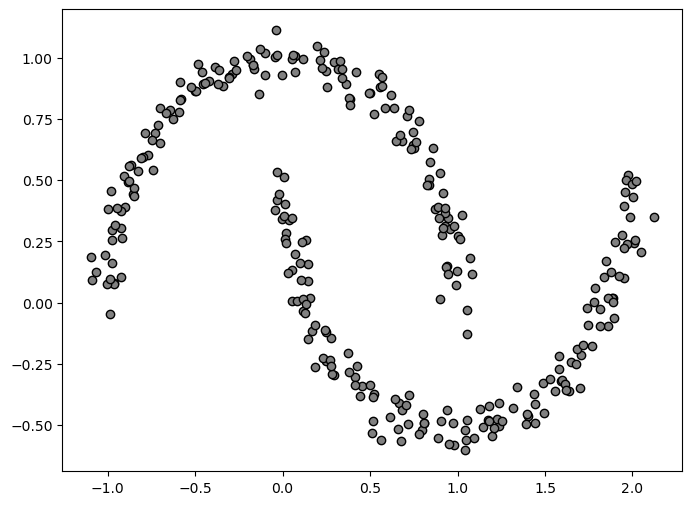

In [3]:
# 라벨링되지 않은 데이터 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=[8, 6])
plt.scatter(X[:, 0], X[:, 1], c='gray', edgecolors='black', marker='o')
plt.show()

In [6]:
# 밀도 기반 클러스터링 모델 생성 후 데이터 학습
from sklearn.cluster import DBSCAN # 밀도 기반 클러스터링을 사용하기 위해 import 한다.
# min_samples 속성으로 일정 반경내에 최소한의 데이터 포인트 개수(기본값은 5)를 지정하고 eps 속성으로
# 데이터 포인트의 개수를 측정할 반경을 지정한다.
dbs = DBSCAN(min_samples=5, eps=0.2) # 밀도 기반 클러스터링 모델을 만든다.
dbs.fit(X) # 피쳐 데이터 X를 모델에 넣어서 밀도 기반 클러스터링 알고리즘을 학습시킨다.

DBSCAN(eps=0.2)

In [7]:
# 클러스터링 결과(레이블)를 확인한다.
label_dbs = dbs.labels_
print(label_dbs)

[0 0 1 0 0 1 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 1 1 1 0 1 0 0 0 0 1 1 1 1 0 0 0
 0 0 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0 1
 1 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0
 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 1 1 0 1 0 1 1 1
 1 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 1
 1 0 1 0 1 0 0 1 0 1 1 1 0 1 0 0 0 1 1 1 1 0 1 0 1 0 1 1 1 0 1 0 1 0 0 0 1
 1 0 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 0 1
 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0
 0 1 1 0]


클러스터링된 데이터 시각화

In [8]:
import pandas as pd
dbs_columns = ['dbs_comp1', 'dbs_comp2']
X_dbs_df = pd.DataFrame(X, columns=dbs_columns)
X_dbs_df['target'] = y
X_dbs_df['label_dbs'] = label_dbs # 데이터프레임에 클러스터링된 라벨을 결합한다.
X_dbs_df

,dbs_comp1,dbs_comp2,target,label_dbs
0,0.715413,-0.494089,1,0
1,0.246789,-0.240091,1,0
2,0.943261,0.346800,0,1
3,0.973742,-0.492901,1,0
4,1.239713,-0.411411,1,0
...,...,...,...,...
295,1.530635,-0.311922,1,0
296,0.275923,-0.259083,1,0
297,-0.742257,0.541587,0,1
298,0.570287,0.921368,0,1


In [9]:
# 타겟 클래스와 클러스터링 라벨의 종류 확인
print(set(X_dbs_df.target), set(X_dbs_df.label_dbs))

{0, 1} {0, 1}


실제 타겟 데이터 시각화

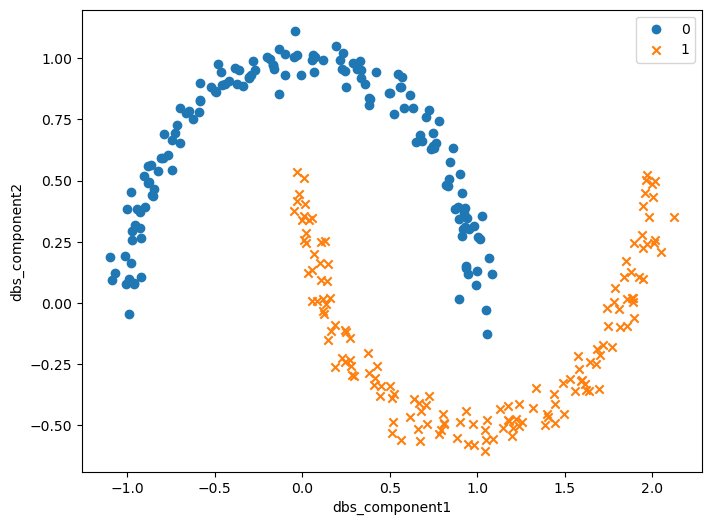

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=[8, 6])
markers = ['o', 'x']

for index, marker in enumerate(markers):
    df_index = X_dbs_df[X_dbs_df.target == index]
    target_index = index
    X1 = df_index.dbs_comp1
    X2 = df_index.dbs_comp2
    plt.scatter(X1, X2, marker=marker, label=target_index)

plt.xlabel('dbs_component1')
plt.ylabel('dbs_component2')
plt.legend()
plt.show()

밀도 기반 클러스터링 적용 데이터 시각화

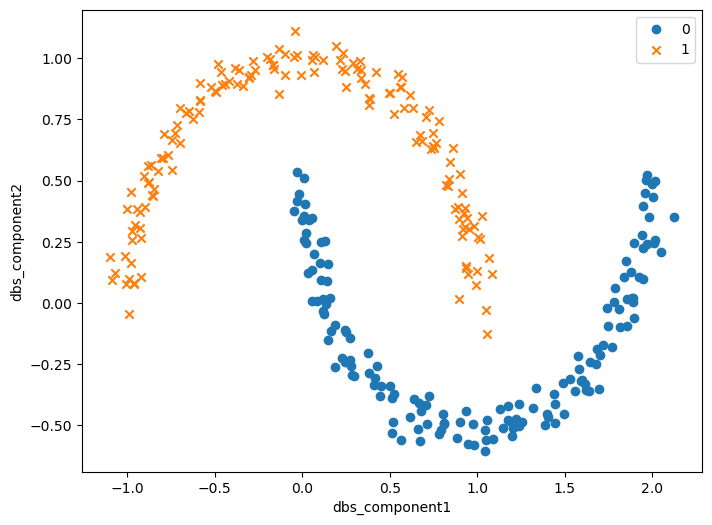

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=[8, 6])
markers = ['o', 'x']

for index, marker in enumerate(markers):
    df_index = X_dbs_df[X_dbs_df.label_dbs == index]
    target_index = index
    X1 = df_index.dbs_comp1
    X2 = df_index.dbs_comp2
    plt.scatter(X1, X2, marker=marker, label=target_index)

plt.xlabel('dbs_component1')
plt.ylabel('dbs_component2')
plt.legend()
plt.show()

In [13]:
# 실루엣 스코어
from sklearn.metrics import silhouette_score # 실루엣 스코어 알고리즘을 사용하기 위해 import 한다.
# silhouette_score() 메소드에 피처 데이터(X)와 군집화 결과로 얻은 레이블(label_dbs)을 넘겨 실루엣 스코어를 평가한다.
sil_score = silhouette_score(X, label_dbs)
print(sil_score)

0.32847820126315047
